Cargando datos de XAUUSD...
Columnas encontradas: ['<DATE>', '<TIME>', '<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<TICKVOL>', '<VOL>', '<SPREAD>']
Forma del DataFrame: (98932, 9)
Datos procesados Exitosamente (formato MT).

Iniciando Análisis Exploratorio de Datos (EDA) para XAUUSD M1...

INFORMACION BASICA DEL DATASET
Período: 2025-06-17 17:50:00 a 2025-09-25 23:57:00
Total de registros: 98,932
Total de columnas: 7
Timeframe: M1 (1 minuto)
Duración total: 100 días

--- Primeras 5 filas ---
                        Open     High      Low    Close  Volume  RealVolume  \
DATETIME                                                                      
2025-06-17 17:50:00  3378.64  3379.37  3377.41  3379.07     259           0   
2025-06-17 17:51:00  3379.07  3380.12  3378.86  3379.92     283           0   
2025-06-17 17:52:00  3379.92  3383.21  3379.60  3381.80     341           0   
2025-06-17 17:53:00  3381.78  3382.96  3381.72  3382.58     283           0   
2025-06-17 17:54:00  3382.65  33

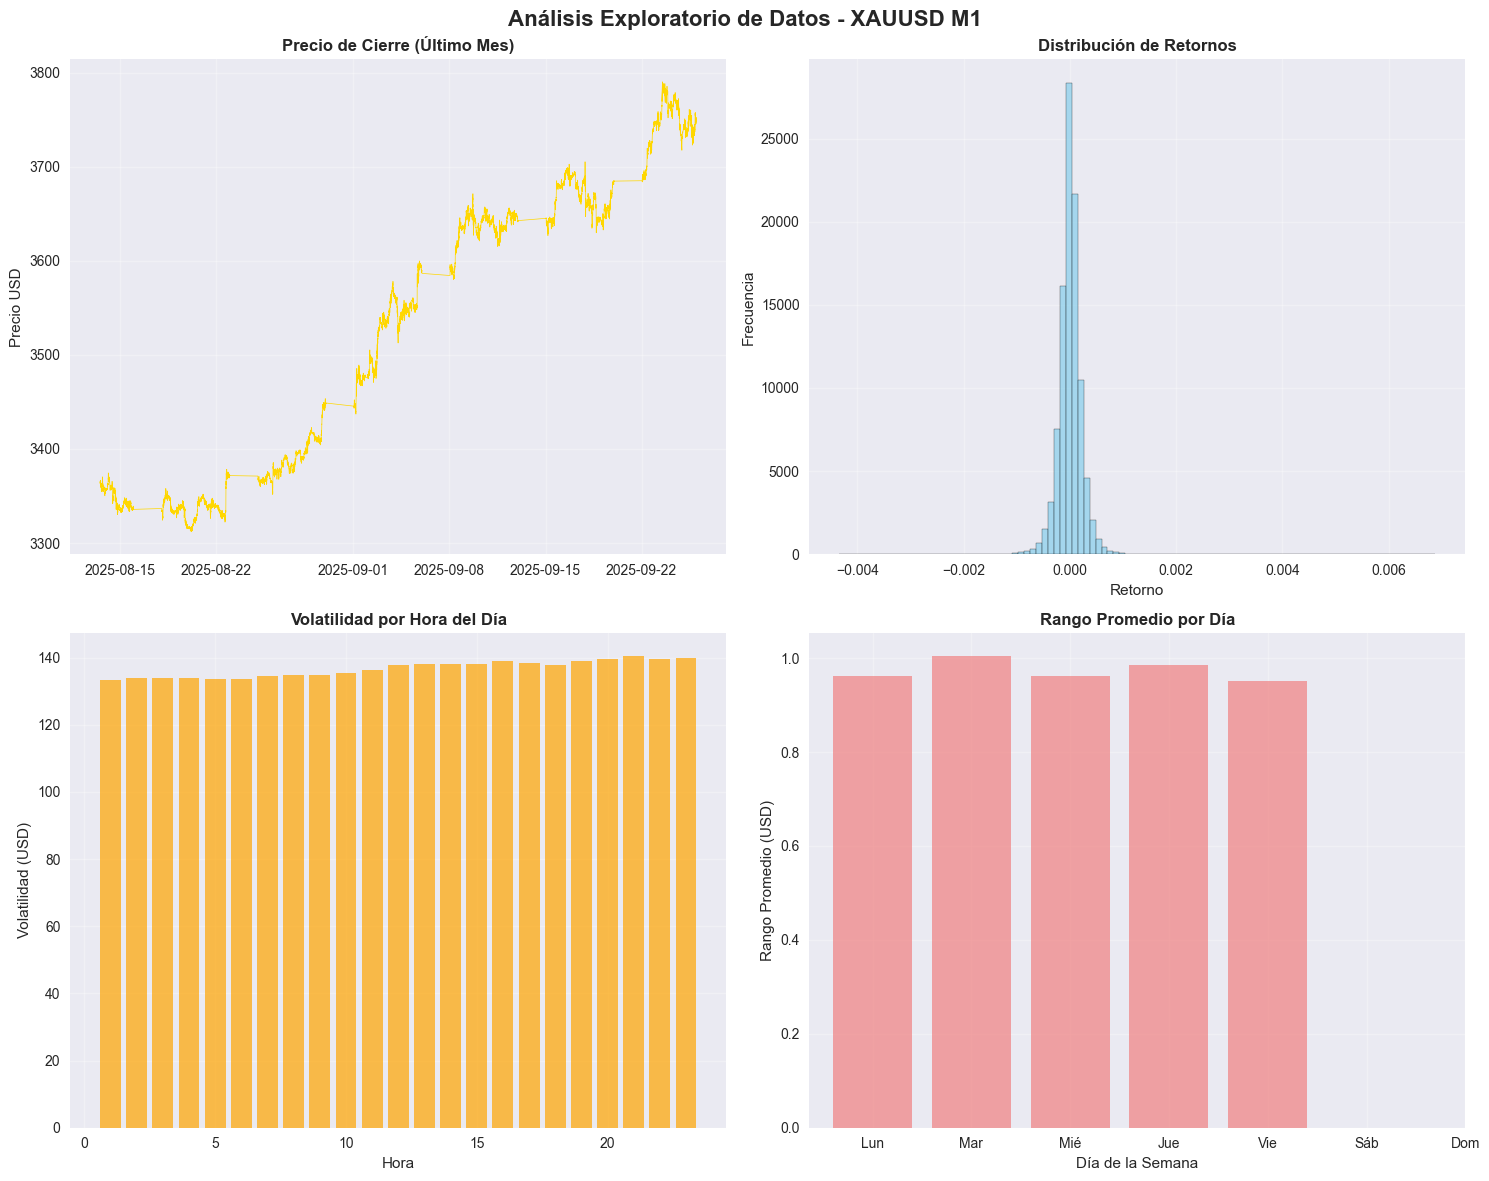

 Visualizaciones generadas exitosamente

INSIGHTS PARA TRADING
⏰ Mejores horas para trading (mayor volatilidad):
  1. 17:00 (Volatilidad: 0.000352)
  2. 16:00 (Volatilidad: 0.000327)
  3. 18:00 (Volatilidad: 0.000270)
  4. 15:00 (Volatilidad: 0.000249)
  5. 04:00 (Volatilidad: 0.000227)

 Niveles técnicos recientes:
   Resistencia (95%): $3777.64
   Soporte (5%): $3642.90
   Precio actual: $3749.61
   Distancia a resistencia: 0.75%
   Distancia a soporte: 2.85%

 RECOMENDACIONES PARA EL BOT:
  1. Operar preferentemente en las horas de mayor volatilidad
  2. Considerar stop-loss basado en ATR o volatilidad histórica
  3. Monitorear gaps temporales para evitar ejecuciones erróneas
  4. Usar timeframes múltiples para confirmación de señales
  5. Backtesting exhaustivo antes de trading en vivo

Datos procesados guardados en: ./XAUUSD_M1_Processed.csv


In [8]:
# Análisis Exploratorio de Datos (EDA) para Bot de Trading de XAUUSD 
# Autor: SsantiDev
# Fecha: 2025-09-26
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

#Configuracion de matplotlib para mejor visualizacion
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

class GoldDataAnalyzer:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = None
        self.load_data()
        
    def load_data(self):
        """ Carga y procesa los datos de Oro M1"""
        try:
            #Intentar diferentes separadores y formatos 
            print("Cargando datos de XAUUSD...")
            
            #Se intenta con tabulacion
            self.df = pd.read_csv(self.file_path, sep='\t')
            
            #Si no tiene las columnas esperadas, intentar con coma
            if len(self.df.columns) < 5:
                self.df = pd.read_csv(self.file_path, sep=',')
            
            print(f"Columnas encontradas: {list(self.df.columns)}")
            print(f"Forma del DataFrame: {self.df.shape}")
            
            #Procesar columnas según el formato típico de MT4/MT5
            if '<DATE>' in self.df.columns[0] or 'DATE' in str(self.df.columns[0]).upper():
                self.process_mt_format()
            else:
                self.process_standar_format()
        
        except FileNotFoundError:
            print(f"Error: El archivo {self.file_path} no fue encontrado.")
            print("Asegurate de que el archivo este en el directorio correcto.")
            self.df = pd.DataFrame()     
        except Exception as e:
            print(f"Error al cargar los datos: {e}")
            self.df = pd.DataFrame()
            
    def process_mt_format(self):
        """Procesa formato tipico de MetaTrader"""
        try: 
            if len(self.df.columns) == 7:
                self.df.columns = ['<DATE>', '<TIME>', '<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<TICKVOL>']
            elif len(self.df.columns) == 9:
                self.df.columns = ['<DATE>', '<TIME>', '<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<TICKVOL>', '<VOL>', '<SPREAD>']
            else:
                print(f"⚠️ Formato inesperado con {len(self.df.columns)} columnas. Se asignan nombres genéricos.")
                self.df.columns = [f'Col_{i}' for i in range(len(self.df.columns))]
            
            #Combinar Fecha y Hora si están separadas
            if '<DATE>' in self.df.columns and '<TIME>' in self.df.columns:
                self.df['DATETIME'] = pd.to_datetime(
                    self.df['<DATE>'].astype(str) + ' ' + self.df['<TIME>'].astype(str),
                    errors='coerce'
                )
                self.df.drop(columns=['<DATE>', '<TIME>'], axis=1, inplace=True)
            
            #Convertir Datetime si no se procesó antes
            if 'DATETIME' not in self.df.columns:
                self.df['DATETIME'] = pd.to_datetime(self.df.iloc[:, 0], errors='coerce')
                
            #Establecer indice
            self.df.set_index('DATETIME', inplace=True)
            
            #Convertir columnas numericas
            numeric_cols = ['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<TICKVOL>', '<VOL>', '<SPREAD>']
            for col in numeric_cols:
                if col in self.df.columns:
                    self.df[col] = pd.to_numeric(self.df[col], errors='coerce')
                    
            rename_map = {
                '<OPEN>': 'Open',
                '<HIGH>': 'High',
                '<LOW>': 'Low',
                '<CLOSE>': 'Close',
                '<TICKVOL>': 'Volume',
                '<VOL>': 'RealVolume',
                '<SPREAD>': 'Spread'
            }
            self.df.rename(columns=rename_map, inplace=True)
            
            print("Datos procesados Exitosamente (formato MT).")
            
        except Exception as e:
            print(f"Error al procesar formato MT: {e}")
            self.df = pd.DataFrame()
            
            
    
    def process_standar_format(self):
        """Procesa formato estandar CSV"""
        try:
            #Asumir formato estándar: DateTime, OHLCV
            if len(self.df.columns) >= 5:
                expected_cols = ['DATETIME', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']
                if len(self.df.columns) >= 6:
                    expected_cols.append('VOLUME')
                    
            self.df.columns = expected_cols + [f'Extra_{i}' for  i in range(len(expected_cols), len(self.df.columns))]
            
            #Convertir Datetime
            self.df['DATETIME'] = pd.to_datetime(self.df['DATETIME'], errors='coerce')
            self.df.set_index('DATETIME', inplace=True)
            
            #Convertir columnas numéricas
            numeric_cols = ['OPEN', 'HIGH', 'LOW', 'CLOSE']
            if 'VOLUME' in self.df.columns:
                numeric_cols.append('VOLUME') 
                
                
            for col in numeric_cols:
                self.df[col] = pd.to_numeric(self.df[col], errors='coerce')
                
            print("Datos procesados Exitosamente (formato Estandar).")
        except Exception as e:
            print(f"Error al procesar formato estandar: {e}")
    
    def basic_info(self):
        """Muestra informacion basica del dataset"""
        if self.df.empty:
            print("DataFrame vacio. No hay datos para mostrar.")
            return
        
        print("\n" + "="*60)
        print("INFORMACION BASICA DEL DATASET") 
        print("="*60)
        
        print(f"Período: {self.df.index.min()} a {self.df.index.max()}")
        print(f"Total de registros: {len(self.df):,}")
        print(f"Total de columnas: {len(self.df.columns)}")
        print(f"Timeframe: M1 (1 minuto)")
        
        # Calcular duración
        duration = self.df.index.max() - self.df.index.min()
        print(f"Duración total: {duration.days} días")
        
        print("\n--- Primeras 5 filas ---")
        print(self.df.head())
        
        print("\n--- Últimas 5 filas ---")
        print(self.df.tail())
        
        print("\n--- Información de tipos de datos ---")
        self.df.info()
        
        print("\n--- Estadísticas descriptivas ---")
        print(self.df.describe())             
    
    def check_data_quality(self):
        """Verifica la calidad de los datos"""
        if self.df.empty:
            print("DataFrame vacio. No hay datos para analizar.")
            return
        
        print("\n" + "="*60)
        print("ANÁLISIS DE CALIDAD DE DATOS")
        print("="*60)
        
        #Valores nulos
        null_counts = self.df.isnull().sum()
        print("\nValores nulos por columna:")
        for col, count in null_counts.items():
            percentage = (count / len(self.df)) * 100
            print(f"  {col}: {count:,} ({percentage:.2f}%)")
        
        # Duplicados
        duplicates = self.df.duplicated().sum()
        print(f"\nRegistros duplicados: {duplicates:,}")
        
        # Verificar consistencia OHLC
        if all(col in self.df.columns for col in ['Open', 'High', 'Low', 'Close']):
            inconsistent = (
                (self.df['High'] < self.df['Open']) |
                (self.df['High'] < self.df['Close']) |
                (self.df['Low'] > self.df['Open']) |
                (self.df['Low'] > self.df['Close']) |
                (self.df['High'] < self.df['Low'])
            ).sum()
            print(f"Registros con inconsistencias OHLC: {inconsistent:,}")
        
        # Gaps en el tiempo (para datos M1)
        time_diff = self.df.index.to_series().diff()
        expected_diff = pd.Timedelta(minutes=1)
        gaps = (time_diff > expected_diff * 2).sum()  # Más de 2 minutos de diferencia
        print(f"Gaps temporales detectados: {gaps:,}")
                
    def price_analysis(self):
        """Analisis de precios y volatilidad"""
        if self.df.empty or 'Close' not in self.df.columns:
            print("DataFrame vacio o columna 'Close' no encontrada. No hay datos para analizar.")
            return
        
        print("\n" + "="*60)
        print("ANÁLISIS DE PRECIOS Y VOLATILIDAD")
        print("="*60)
        
        close =self.df['Close']
        # Estadísticas básicas de precio
        print(f"Precio mínimo: ${close.min():.2f}")
        print(f"Precio máximo: ${close.max():.2f}")
        print(f"Precio promedio: ${close.mean():.2f}")
        print(f"Precio mediano: ${close.median():.2f}")
        print(f"Volatilidad (std): ${close.std():.2f}")
        
        # Calcular retornos
        returns = close.pct_change().dropna()
        print(f"\nRetorno promedio: {returns.mean()*100:.4f}%")
        print(f"Volatilidad de retornos: {returns.std()*100:.4f}%")
        print(f"Retorno mínimo: {returns.min()*100:.2f}%")
        print(f"Retorno máximo: {returns.max()*100:.2f}%")
        
        # Análisis de rangos (High - Low)
        if all(col in self.df.columns for col in ['High', 'Low']):
            ranges = self.df['High'] - self.df['Low']
            print(f"\nRango promedio (H-L): ${ranges.mean():.2f}")
            print(f"Rango máximo: ${ranges.max():.2f}")
            print(f"Rango mínimo: ${ranges.min():.2f}")
            
    def time_analysis(self):
        """Analisis temporal de los datos"""
        if self.df.empty:
            print("DataFrame vacio. No hay datos para analizar.")
            return
        
        print("\n" + "="*60)
        print("ANÁLISIS TEMPORAL DE LOS DATOS")
        print("="*60)
        
        #Crear columnas temporales
        df_temp = self.df.copy()
        df_temp['Hour'] = df_temp.index.hour
        df_temp['DayOfWeek'] = df_temp.index.dayofweek
        df_temp['Month'] = df_temp.index.month
        
        # Análisis por hora
        if 'Close' in df_temp.columns:
            hourly_volatility = df_temp.groupby('Hour')['Close'].std()
            print("\n🕐 Volatilidad por hora (Top 5):")
            for hour, vol in hourly_volatility.nlargest(5).items():
                print(f"  {hour:02d}:00 - ${vol:.3f}")
            
            # Análisis por día de la semana
            daily_volatility = df_temp.groupby('DayOfWeek')['Close'].std()
            days = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
            print("\nVolatilidad por día de la semana:")
            for day_num, vol in daily_volatility.items():
                if day_num < len(days):
                    print(f"  {days[day_num]}: ${vol:.3f}")
        
    def create_visualizations(self):
        """Crea visualizaciones para el análisis"""
        if self.df.empty:
            print("DataFrame vacio. No hay datos para visualizar.")
            return
        
        print("\n" + "="*60)
        print("CREANDO VISUALIZACIONES")
        print("="*60)
        
         # Configurar subplots
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Análisis Exploratorio de Datos - XAUUSD M1', fontsize=16, fontweight='bold')
        
        # 1. Gráfico de precios de cierre
        if 'Close' in self.df.columns:
            # Usar una muestra para visualización (último mes)
            sample_data = self.df.tail(43200)  # Aproximadamente 30 días de datos M1
            
            axes[0, 0].plot(sample_data.index, sample_data['Close'], linewidth=0.5, color='gold')
            axes[0, 0].set_title('Precio de Cierre (Último Mes)', fontweight='bold')
            axes[0, 0].set_ylabel('Precio USD')
            axes[0, 0].grid(True, alpha=0.3)
        
        # 2. Distribución de retornos
        if 'Close' in self.df.columns:
            returns = self.df['Close'].pct_change().dropna()
            axes[0, 1].hist(returns, bins=100, alpha=0.7, color='skyblue', edgecolor='black')
            axes[0, 1].set_title('Distribución de Retornos', fontweight='bold')
            axes[0, 1].set_xlabel('Retorno')
            axes[0, 1].set_ylabel('Frecuencia')
            axes[0, 1].grid(True, alpha=0.3)
        
        # 3. Volatilidad por hora
        df_temp = self.df.copy()
        df_temp['Hour'] = df_temp.index.hour
        if 'Close' in df_temp.columns:
            hourly_vol = df_temp.groupby('Hour')['Close'].std()
            axes[1, 0].bar(hourly_vol.index, hourly_vol.values, color='orange', alpha=0.7)
            axes[1, 0].set_title('Volatilidad por Hora del Día', fontweight='bold')
            axes[1, 0].set_xlabel('Hora')
            axes[1, 0].set_ylabel('Volatilidad (USD)')
            axes[1, 0].grid(True, alpha=0.3)
        
        # 4. Rangos (High-Low) por día de la semana
        if all(col in self.df.columns for col in ['High', 'Low']):
            df_temp['DayOfWeek'] = df_temp.index.dayofweek
            df_temp['Range'] = df_temp['High'] - df_temp['Low']
            daily_range = df_temp.groupby('DayOfWeek')['Range'].mean()
            
            days = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
            axes[1, 1].bar(range(len(daily_range)), daily_range.values, 
                          color='lightcoral', alpha=0.7)
            axes[1, 1].set_title('Rango Promedio por Día', fontweight='bold')
            axes[1, 1].set_xlabel('Día de la Semana')
            axes[1, 1].set_ylabel('Rango Promedio (USD)')
            axes[1, 1].set_xticks(range(len(days)))
            axes[1, 1].set_xticklabels(days)
            axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print(" Visualizaciones generadas exitosamente")
        
    def generate_trading_insights(self):
        """Genera insights para trading"""
        if self.df.empty:
            print("DataFrame vacio. No hay datos para generar insights.")
            return
        
        print("\n" + "="*60)
        print("INSIGHTS PARA TRADING")
        print("="*60)
        
        if 'Close' not in self.df.columns:
            print(" No se pueden generar insights sin datos de precios")
            return
        
        # Análisis de volatilidad para identificar mejores horas de trading
        df_temp = self.df.copy()
        df_temp['Hour'] = df_temp.index.hour
        df_temp['Returns'] = df_temp['Close'].pct_change()
        df_temp['Volatility'] = df_temp['Returns'].rolling(window=60).std()  # Ventana de 1 hora
        
        # Mejores horas para trading (mayor volatilidad)
        hourly_vol = df_temp.groupby('Hour')['Volatility'].mean().dropna()
        best_hours = hourly_vol.nlargest(5).index.tolist()
        
        print("⏰ Mejores horas para trading (mayor volatilidad):")
        for i, hour in enumerate(best_hours, 1):
            print(f"  {i}. {hour:02d}:00 (Volatilidad: {hourly_vol[hour]:.6f})")
        
        # Análisis de support y resistance básico
        recent_data = self.df.tail(10080)  # Últimos 7 días
        if len(recent_data) > 0 and 'High' in recent_data.columns and 'Low' in recent_data.columns:
            resistance = recent_data['High'].quantile(0.95)
            support = recent_data['Low'].quantile(0.05)
            current_price = recent_data['Close'].iloc[-1]
            
            print(f"\n Niveles técnicos recientes:")
            print(f"   Resistencia (95%): ${resistance:.2f}")
            print(f"   Soporte (5%): ${support:.2f}")
            print(f"   Precio actual: ${current_price:.2f}")
            
            # Distancia a niveles clave
            dist_to_resistance = ((resistance - current_price) / current_price) * 100
            dist_to_support = ((current_price - support) / current_price) * 100
            
            print(f"   Distancia a resistencia: {dist_to_resistance:.2f}%")
            print(f"   Distancia a soporte: {dist_to_support:.2f}%")
        
        # Recomendaciones básicas
        print(f"\n RECOMENDACIONES PARA EL BOT:")
        print(f"  1. Operar preferentemente en las horas de mayor volatilidad")
        print(f"  2. Considerar stop-loss basado en ATR o volatilidad histórica")
        print(f"  3. Monitorear gaps temporales para evitar ejecuciones erróneas")
        print(f"  4. Usar timeframes múltiples para confirmación de señales")
        print(f"  5. Backtesting exhaustivo antes de trading en vivo")
        
    def run_full_analysis(self):
        """Ejecuta todo el análisis"""
        print("\nIniciando Análisis Exploratorio de Datos (EDA) para XAUUSD M1...")
        print("="*80)
        
        if self.df.empty:
            print("No hay datos cargados. Terminando análisis.")
            return
        
         # Ejecutar todos los análisis
        self.basic_info()
        self.check_data_quality()
        self.price_analysis()
        self.time_analysis()
        self.create_visualizations()
        self.generate_trading_insights()
        
if __name__ == "__main__":
    file_path = '../Data/XAUUSD_M1_202506171750_202509252357.csv'
    analyzer = GoldDataAnalyzer(file_path)
    analyzer.run_full_analysis()
    
    import os
    
    if not analyzer.df.empty:
        output_path = "./XAUUSD_M1_Processed.csv"
        analyzer.df.to_csv(output_path, index=False)
        print(f"\nDatos procesados guardados en: {output_path}")
                
                
                
                
        
